In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('dataset2.csv')
data

,Date,Hour,CO,nuovo2
0,2004-03-10,18,1360.0,2004-03-10 18:00:00
1,2004-03-10,19,1292.0,2004-03-10 19:00:00
2,2004-03-10,20,1402.0,2004-03-10 20:00:00
3,2004-03-10,21,1376.0,2004-03-10 21:00:00
4,2004-03-10,22,1272.0,2004-03-10 22:00:00
...,...,...,...,...
8521,2005-02-28,19,938.0,2005-02-28 19:00:00
8522,2005-02-28,20,939.0,2005-02-28 20:00:00
8523,2005-02-28,21,827.0,2005-02-28 21:00:00
8524,2005-02-28,22,776.0,2005-02-28 22:00:00


In [ ]:
data[7855:]

,Date,Hour,CO,nuovo2
7855,2005-02-01,1,996.0,2005-02-01 01:00:00
7856,2005-02-01,2,995.0,2005-02-01 02:00:00
7857,2005-02-01,3,1000.0,2005-02-01 03:00:00
7858,2005-02-01,4,1042.0,2005-02-01 04:00:00
7859,2005-02-01,5,1042.0,2005-02-01 05:00:00
...,...,...,...,...
8521,2005-02-28,19,938.0,2005-02-28 19:00:00
8522,2005-02-28,20,939.0,2005-02-28 20:00:00
8523,2005-02-28,21,827.0,2005-02-28 21:00:00
8524,2005-02-28,22,776.0,2005-02-28 22:00:00


In [ ]:
ts = data[['nuovo2','CO']].set_index('nuovo2')
ts

,CO
nuovo2,
2004-03-10 18:00:00,1360.0
2004-03-10 19:00:00,1292.0
2004-03-10 20:00:00,1402.0
2004-03-10 21:00:00,1376.0
2004-03-10 22:00:00,1272.0
...,...
2005-02-28 19:00:00,938.0
2005-02-28 20:00:00,939.0
2005-02-28 21:00:00,827.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(ts)

In [ ]:
train, test = dataset[0:7854,:], dataset[7855:len(dataset),:]
print(len(train), len(test))

7854 671


In [ ]:
def create_dataset(dataset, look_back=1): #rimodella dataset per RNN
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 168 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=45, verbose=2)

Epoch 1/50
171/171 - 5s - loss: 0.0254 - 5s/epoch - 30ms/step
Epoch 2/50
171/171 - 0s - loss: 0.0100 - 470ms/epoch - 3ms/step
Epoch 3/50
171/171 - 0s - loss: 0.0070 - 469ms/epoch - 3ms/step
Epoch 4/50
171/171 - 0s - loss: 0.0058 - 468ms/epoch - 3ms/step
Epoch 5/50
171/171 - 0s - loss: 0.0052 - 469ms/epoch - 3ms/step
Epoch 6/50
171/171 - 0s - loss: 0.0048 - 471ms/epoch - 3ms/step
Epoch 7/50
171/171 - 0s - loss: 0.0046 - 467ms/epoch - 3ms/step
Epoch 8/50
171/171 - 0s - loss: 0.0043 - 460ms/epoch - 3ms/step
Epoch 9/50
171/171 - 0s - loss: 0.0041 - 464ms/epoch - 3ms/step
Epoch 10/50
171/171 - 0s - loss: 0.0040 - 450ms/epoch - 3ms/step
Epoch 11/50
171/171 - 0s - loss: 0.0039 - 451ms/epoch - 3ms/step
Epoch 12/50
171/171 - 0s - loss: 0.0037 - 475ms/epoch - 3ms/step
Epoch 13/50
171/171 - 0s - loss: 0.0036 - 458ms/epoch - 3ms/step
Epoch 14/50
171/171 - 0s - loss: 0.0036 - 467ms/epoch - 3ms/step
Epoch 15/50
171/171 - 0s - loss: 0.0035 - 458ms/epoch - 3ms/step
Epoch 16/50
171/171 - 0s - loss: 0.0

In [ ]:
#Previsioni 
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#Prev scaled
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#Calcolo MAPE
trainScore = mean_absolute_percentage_error(trainY[0], trainPredict[:,0])
print('Train Score: %.4f MAPE' % (trainScore))
testScore = mean_absolute_percentage_error(testY[0], testPredict[:,0])
print('Test Score: %.4f MAPE' % (testScore))

Train Score: 0.0475 MAPE
Test Score: 0.0480 MAPE


In [ ]:
testPredict

array([[ 898.9109 ],
       [ 900.4898 ],
       [ 875.06665],
       [ 839.42004],
       [ 889.09705],
       [ 966.11316],
       [1043.497  ],
       [1181.8575 ],
       [1277.2244 ],
       [1213.837  ],
       [1083.8623 ],
       [1054.4696 ],
       [1059.0708 ],
       [1038.1667 ],
       [1067.4196 ],
       [1021.9171 ],
       [ 992.32477],
       [1186.7911 ],
       [1185.7196 ],
       [1132.0793 ],
       [1069.4799 ],
       [1068.0098 ],
       [1074.4165 ],
       [1076.3918 ],
       [1108.8845 ],
       [1178.7207 ],
       [1225.9738 ],
       [1317.4918 ],
       [1365.9014 ],
       [1389.037  ],
       [1395.2982 ],
       [1500.064  ],
       [1447.1711 ],
       [1286.4927 ],
       [1269.1876 ],
       [1236.7534 ],
       [1252.2523 ],
       [1222.7074 ],
       [1168.5587 ],
       [1257.161  ],
       [1372.4137 ],
       [1411.7035 ],
       [1391.7163 ],
       [1340.6941 ],
       [1290.762  ],
       [1284.1494 ],
       [1276.1215 ],
       [1258.

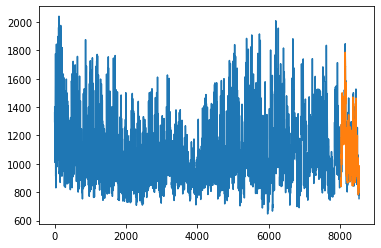

In [ ]:
#Previsioni grafico
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-2, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot)
plt.show()

In [ ]:
test2 = scaler.inverse_transform(test)

In [ ]:
testPredict

array([[ 898.9109 ],
       [ 900.4898 ],
       [ 875.06665],
       [ 839.42004],
       [ 889.09705],
       [ 966.11316],
       [1043.497  ],
       [1181.8575 ],
       [1277.2244 ],
       [1213.837  ],
       [1083.8623 ],
       [1054.4696 ],
       [1059.0708 ],
       [1038.1667 ],
       [1067.4196 ],
       [1021.9171 ],
       [ 992.32477],
       [1186.7911 ],
       [1185.7196 ],
       [1132.0793 ],
       [1069.4799 ],
       [1068.0098 ],
       [1074.4165 ],
       [1076.3918 ],
       [1108.8845 ],
       [1178.7207 ],
       [1225.9738 ],
       [1317.4918 ],
       [1365.9014 ],
       [1389.037  ],
       [1395.2982 ],
       [1500.064  ],
       [1447.1711 ],
       [1286.4927 ],
       [1269.1876 ],
       [1236.7534 ],
       [1252.2523 ],
       [1222.7074 ],
       [1168.5587 ],
       [1257.161  ],
       [1372.4137 ],
       [1411.7035 ],
       [1391.7163 ],
       [1340.6941 ],
       [1290.762  ],
       [1284.1494 ],
       [1276.1215 ],
       [1258.

In [ ]:
MAPE_feb = mean_absolute_percentage_error(test2[169:], testPredict)
print('Train Score: %.4f MAPE' % (MAPE_feb))

Train Score: 0.0703 MAPE


In [ ]:
# PROVARE PREVISIONI SUL MESE FINALE

In [ ]:
test_datetime = pd.date_range(start='2005-03-01', end='2005-04-01', freq ='H')[0:]
test_datetime = test_datetime[:-1]

In [ ]:
train = dataset 

In [ ]:
trainX, trainY = create_dataset(train, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=45, verbose=2)

Epoch 1/50
186/186 - 2s - loss: 0.0119 - 2s/epoch - 11ms/step
Epoch 2/50
186/186 - 1s - loss: 0.0050 - 518ms/epoch - 3ms/step
Epoch 3/50
186/186 - 1s - loss: 0.0043 - 532ms/epoch - 3ms/step
Epoch 4/50
186/186 - 1s - loss: 0.0039 - 535ms/epoch - 3ms/step
Epoch 5/50
186/186 - 1s - loss: 0.0037 - 534ms/epoch - 3ms/step
Epoch 6/50
186/186 - 1s - loss: 0.0036 - 513ms/epoch - 3ms/step
Epoch 7/50
186/186 - 1s - loss: 0.0036 - 521ms/epoch - 3ms/step
Epoch 8/50
186/186 - 1s - loss: 0.0032 - 525ms/epoch - 3ms/step
Epoch 9/50
186/186 - 1s - loss: 0.0033 - 528ms/epoch - 3ms/step
Epoch 10/50
186/186 - 1s - loss: 0.0031 - 525ms/epoch - 3ms/step
Epoch 11/50
186/186 - 1s - loss: 0.0032 - 525ms/epoch - 3ms/step
Epoch 12/50
186/186 - 1s - loss: 0.0031 - 517ms/epoch - 3ms/step
Epoch 13/50
186/186 - 1s - loss: 0.0030 - 532ms/epoch - 3ms/step
Epoch 14/50
186/186 - 1s - loss: 0.0030 - 510ms/epoch - 3ms/step
Epoch 15/50
186/186 - 1s - loss: 0.0029 - 510ms/epoch - 3ms/step
Epoch 16/50
186/186 - 1s - loss: 0.0

In [ ]:
def predict(num_prediction, model): #previsione ricorsiva
    prediction_list = dataset[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, 1, look_back)) 
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back:]
        
    return prediction_list

In [ ]:
forecast = predict(len(test_datetime), model)

In [ ]:
len(forecast)

744

In [ ]:
forecast = scaler.inverse_transform(forecast.reshape(-1,1)).flatten()
forecast

array([  775.62479389,   765.69758601,   751.98159686,   747.56650504,
         754.63596998,   762.55102576,   809.91994052,   893.73789535,
        1052.21339321,  1050.75058353,   995.04354772,   954.74076635,
         932.23047258,   915.58945565,   886.972193  ,   884.2268717 ,
         897.47579007,   915.44676985,   951.10335781,   958.64714821,
         979.19286565,   933.76831996,   892.74019489,   866.70416695,
         861.92230371,   836.88991283,   803.36354458,   773.54198389,
         758.16914565,   745.49515308,   771.58336492,   852.88292782,
         968.17419651,   958.2553746 ,   921.88448583,   886.75613008,
         862.10600597,   848.71247137,   834.37605637,   836.67237614,
         841.97904664,   839.04537344,   861.35751785,   865.54918829,
         888.13734275,   865.24434632,   836.19279908,   809.75983933,
         792.78612412,   773.73909537,   744.89360602,   726.21601083,
         718.72057979,   719.91353915,   759.04769912,   849.81779853,
      

In [ ]:
forecast_DF = pd.DataFrame(forecast, index = test_datetime, columns=['ML'])

In [ ]:
forecast_DF

,ML
2005-03-01 00:00:00,775.624794
2005-03-01 01:00:00,765.697586
2005-03-01 02:00:00,751.981597
2005-03-01 03:00:00,747.566505
2005-03-01 04:00:00,754.635970
...,...
2005-03-31 19:00:00,1023.847024
2005-03-31 20:00:00,265.597824
2005-03-31 21:00:00,-620.105458
2005-03-31 22:00:00,-802.959574


In [ ]:
import datetime
from datetime import datetime

In [ ]:
forecast_DF['Date'] = test_datetime.date
forecast_DF['Hour'] = test_datetime.hour
forecast_DF.head()

,ML,Date,Hour
2005-03-01 00:00:00,775.624794,2005-03-01,0
2005-03-01 01:00:00,765.697586,2005-03-01,1
2005-03-01 02:00:00,751.981597,2005-03-01,2
2005-03-01 03:00:00,747.566505,2005-03-01,3
2005-03-01 04:00:00,754.635970,2005-03-01,4


In [ ]:
forecast_DF['ML2'] = forecast_DF['ML']
forecast_DF.pop('ML')
forecast_DF['ML'] = forecast_DF['ML2']
forecast_DF.pop('ML2')
forecast_DF.head()

,Date,Hour,ML
2005-03-01 00:00:00,2005-03-01,0,775.624794
2005-03-01 01:00:00,2005-03-01,1,765.697586
2005-03-01 02:00:00,2005-03-01,2,751.981597
2005-03-01 03:00:00,2005-03-01,3,747.566505
2005-03-01 04:00:00,2005-03-01,4,754.635970


In [ ]:
forecast_DF['ML'] = forecast_DF['ML'].round()
forecast_DF.head()

,Date,Hour,ML
2005-03-01 00:00:00,2005-03-01,0,776.0
2005-03-01 01:00:00,2005-03-01,1,766.0
2005-03-01 02:00:00,2005-03-01,2,752.0
2005-03-01 03:00:00,2005-03-01,3,748.0
2005-03-01 04:00:00,2005-03-01,4,755.0


In [ ]:
forecast_DF.to_csv('forecast_DF')